In [2]:
#Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils.Functions as fn

# Train

In [3]:
# se impor la base de datos
df_train = pd.read_csv("data/raw/train.csv", index_col=0)

In [4]:
# Se realiza una observación rápida
df_train.sample(20)

,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,,
99826,0,0.582246,44y,2,0.219895,4583.0,8,0,0,0,0.0
80427,0,0.000000,86y,0,0.000000,NaN,1,0,0,0,NaN
147095,0,0.053545,70y,0,0.380905,4000.0,15,0,1,0,0.0
132521,0,0.366909,36y,0,0.147263,5900.0,5,0,0,0,3.0
16241,0,0.662688,62y,1,0.313386,6700.0,8,0,1,0,0.0
4178,0,0.978469,39y,3,0.500467,7500.0,14,0,2,0,2.0
136776,0,0.818037,27y,0,0.417117,5000.0,9,0,0,0,0.0
129544,0,0.109071,24y,0,0.008811,2042.0,3,0,0,0,0.0
81503,0,0.484352,49y,0,0.533446,6532.0,7,0,2,0,2.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73363 entries, 44164 to 88136
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   target                                73363 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 2   age                                   73363 non-null  object 
 3   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 4   DebtRatio                             73363 non-null  float64
 5   MonthlyIncome                         58796 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 7   NumberOfTimes90DaysLate               73363 non-null  int64  
 8   NumberRealEstateLoansOrLines          73363 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 10  NumberOfDependents                    71421 non-null  float64
dtypes: float64(

In [6]:
df_train.describe()

,target,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73363.000000,73363.000000,73363.000000,73363.000000,5.879600e+04,73363.000000,73363.000000,73363.000000,73363.000000,71421.000000
mean,0.065919,5.884904,0.410507,359.752537,6.649145e+03,8.443916,0.256546,1.019928,0.231847,0.755506
std,0.248142,235.508449,4.090014,2477.648064,1.046163e+04,5.142232,4.066573,1.136357,4.052280,1.111715
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029752,0.000000,0.173446,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154688,0.000000,0.365737,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558686,0.000000,0.863514,8.300000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,29110.000000,98.000000,329664.000000,1.560100e+06,57.000000,98.000000,32.000000,98.000000,13.000000


In [7]:
#Se realiza un análisis univalente
fn.get_univariate_analysis(df_train)

Análisis univariante de target:
La columna target no presenta una distribución normal



Análisis univariante de RevolvingUtilizationOfUnsecuredLines:
La columna RevolvingUtilizationOfUnsecuredLines no presenta una distribución normal



Análisis univariante de age:
Variable categórica:
-Valores únicos:
48y     1885
49y     1878
63y     1857
50y     1836
47y     1816
        ... 
99y        3
102y       2
105y       1
0y         1
101y       1
Name: age, Length: 84, dtype: int64
-Número de valores únicos: 84




Análisis univariante de NumberOfTime30-59DaysPastDueNotWorse:
La columna NumberOfTime30-59DaysPastDueNotWorse no presenta una distribución normal



Análisis univariante de DebtRatio:
La columna DebtRatio no presenta una distribución normal



Análisis univariante de MonthlyIncome:
La columna MonthlyIncome presenta una distribución normal



Análisis univariante de NumberOfOpenCreditLinesAndLoans:
La columna NumberOfOpenCreditLinesAndLoans no presenta una distribución normal




,Media,Mediana,Moda,Varianza,Desviacion_estandar,Percentil_25,Percentil_75,K_test,p_value,Distribución
Atributos,,,,,,,,,,
target,0.065919,0.000000,0,6.157434e-02,0.248142,0.000000,0.000000,0.500000,0.0,No normal
RevolvingUtilizationOfUnsecuredLines,5.884904,0.154688,0.0,5.546423e+04,235.508449,0.029752,0.558686,0.500000,0.0,No normal
NumberOfTime30-59DaysPastDueNotWorse,0.410507,0.000000,0,1.672821e+01,4.090014,0.000000,0.000000,0.500000,0.0,No normal
DebtRatio,359.752537,0.365737,0.0,6.138740e+06,2477.648064,0.173446,0.863514,0.500000,0.0,No normal
MonthlyIncome,6649.144670,5400.000000,5000.0,1.094457e+08,10461.631029,3400.000000,8300.000000,NaN,NaN,Normal
NumberOfOpenCreditLinesAndLoans,8.443916,8.000000,6,2.644255e+01,5.142232,5.000000,11.000000,0.934558,0.0,No normal
NumberOfTimes90DaysLate,0.256546,0.000000,0,1.653702e+01,4.066573,0.000000,0.000000,0.500000,0.0,No normal
NumberRealEstateLoansOrLines,1.019928,1.000000,0,1.291307e+00,1.136357,0.000000,2.000000,0.500000,0.0,No normal
NumberOfTime60-89DaysPastDueNotWorse,0.231847,0.000000,0,1.642097e+01,4.052280,0.000000,0.000000,0.500000,0.0,No normal


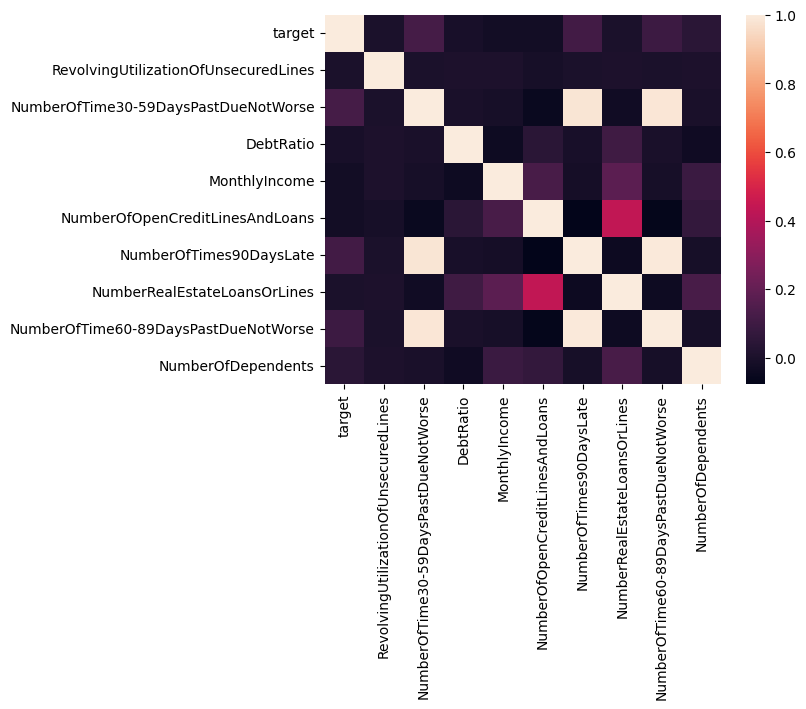

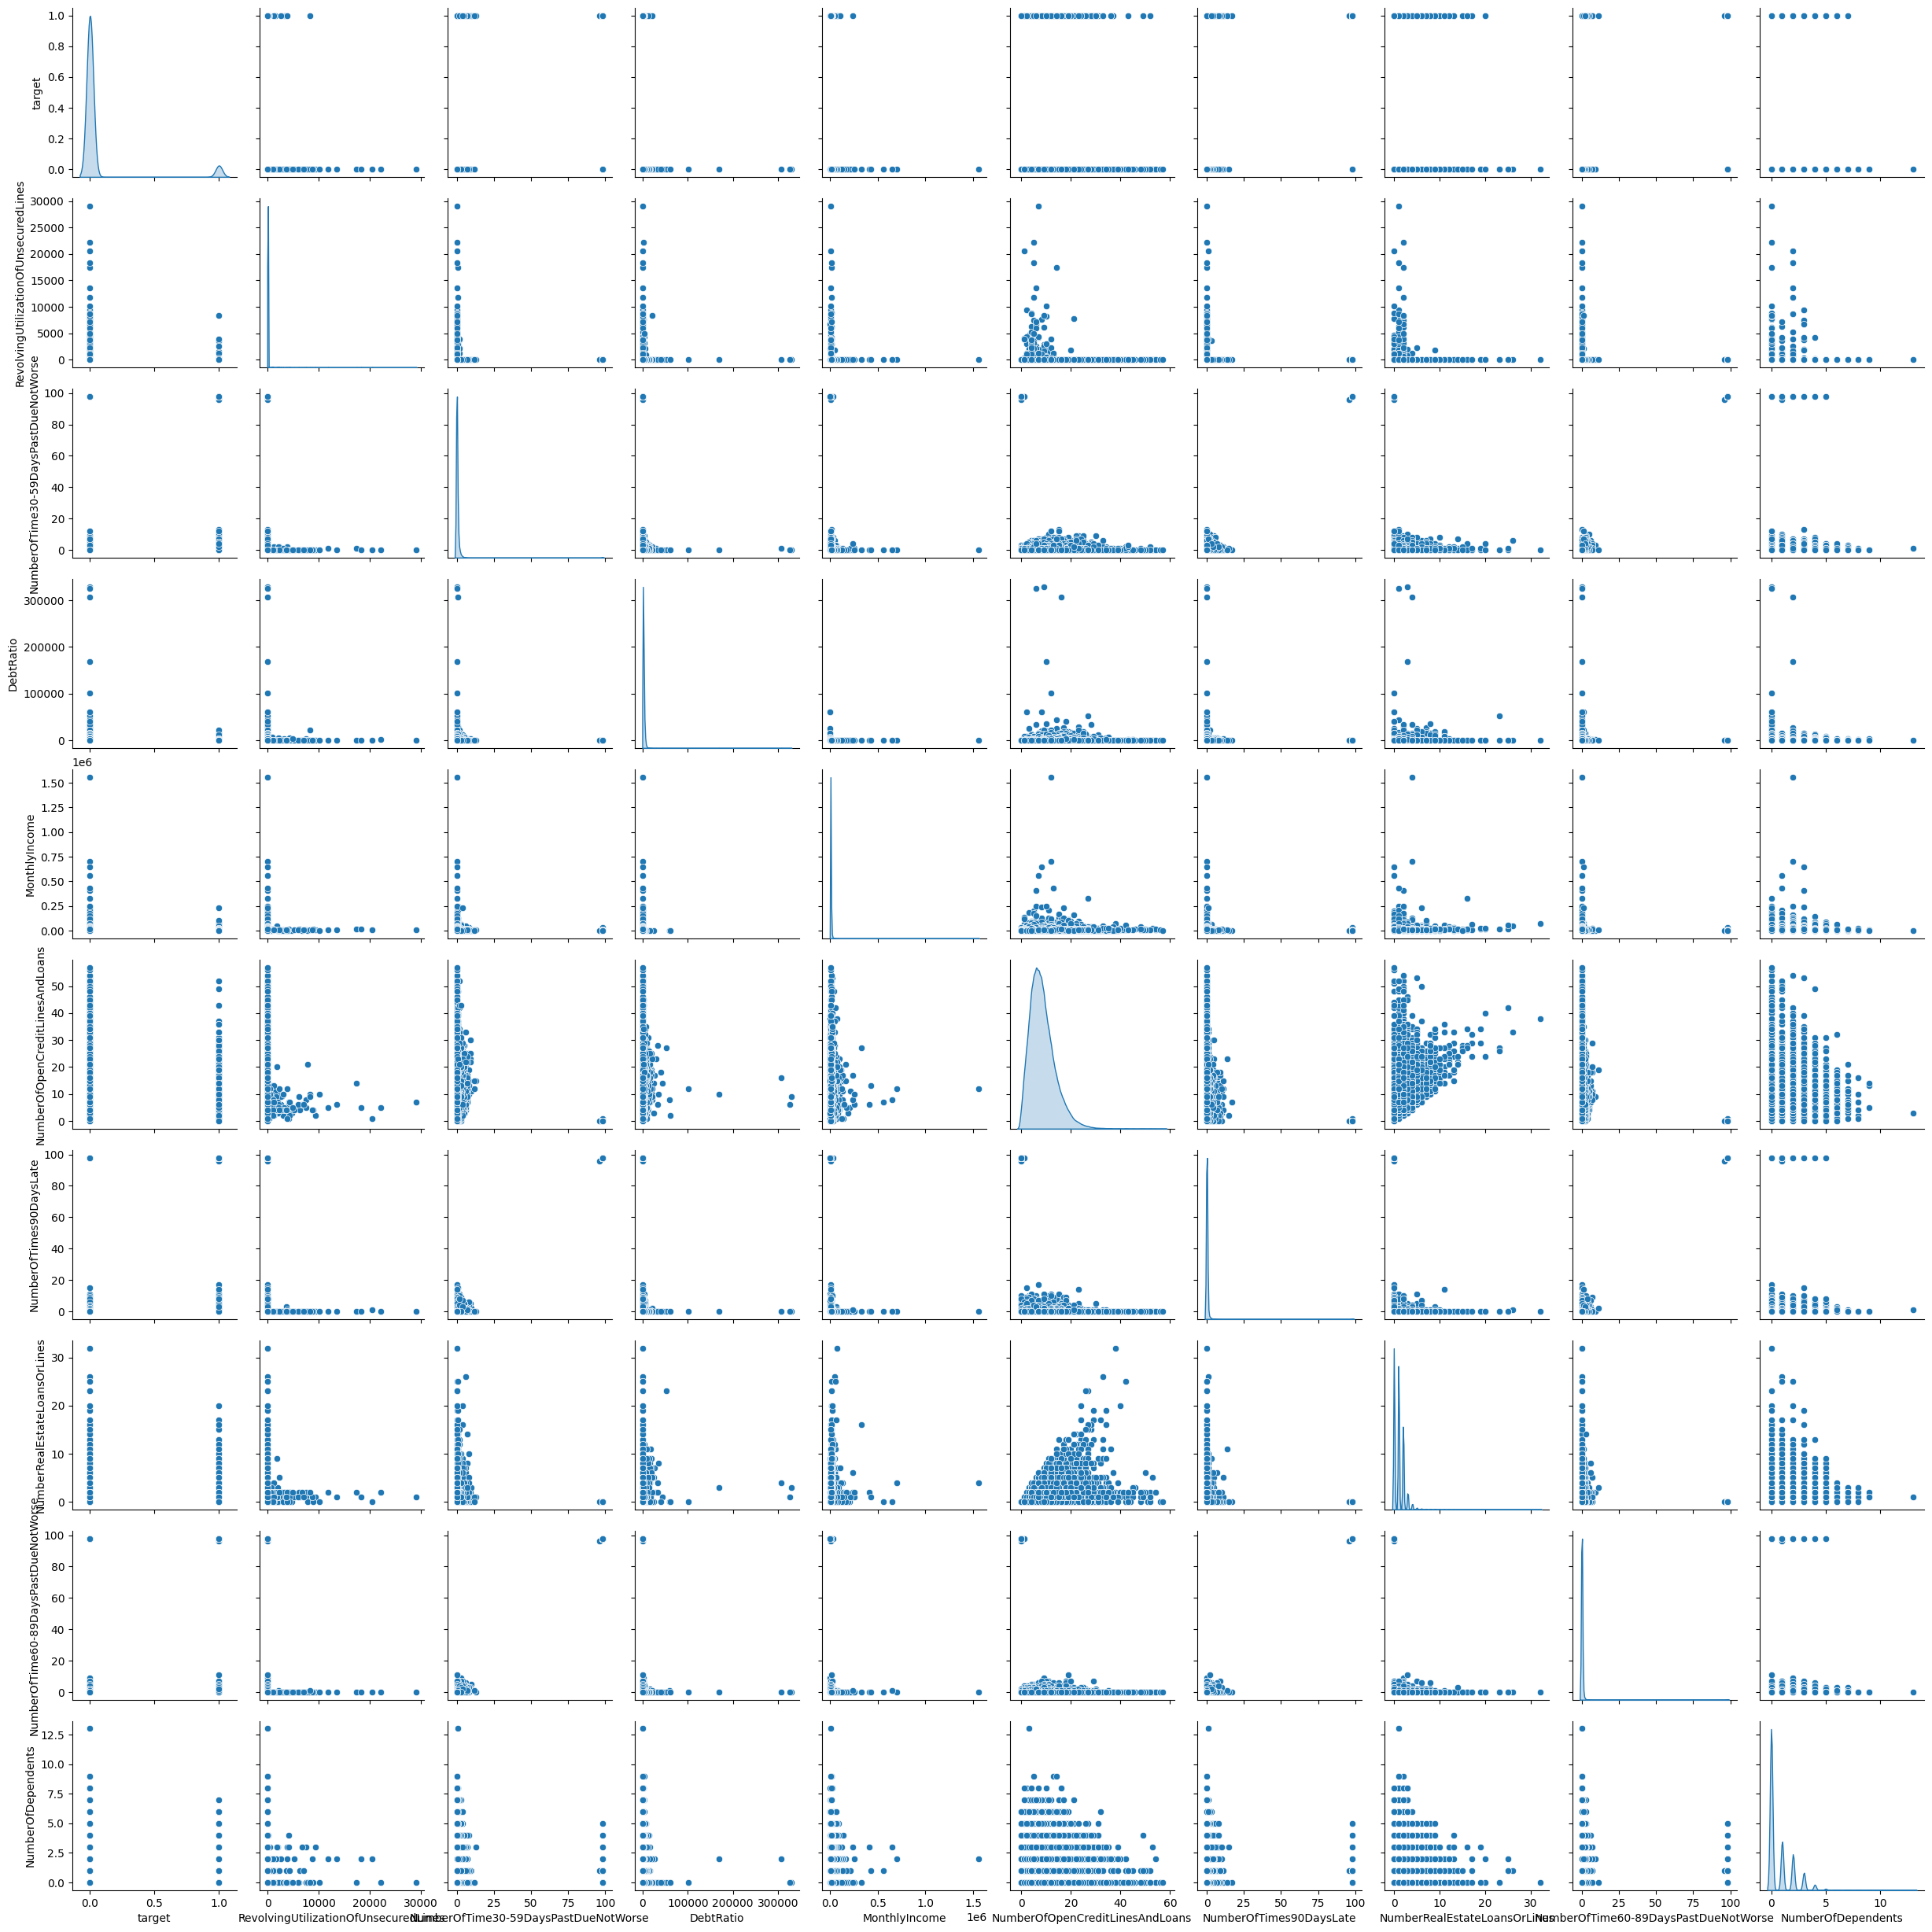

In [8]:
fn.get_bivariate_analysis(df_train)

In [9]:
fn.get_outliers(df_train)

[{'target': 4836,
  'RevolvingUtilizationOfUnsecuredLines': 347,
  'NumberOfTime30-59DaysPastDueNotWorse': 11668,
  'DebtRatio': 15286,
  'MonthlyIncome': 2409,
  'NumberOfOpenCreditLinesAndLoans': 1908,
  'NumberOfTimes90DaysLate': 4021,
  'NumberRealEstateLoansOrLines': 397,
  'NumberOfTime60-89DaysPastDueNotWorse': 3686,
  'NumberOfDependents': 6520},
 {'target': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   

In [10]:
df_train["age"] = df_train["age"].str.replace(r"y\b", "", regex=True).astype(int)


In [11]:
df_train.loc[df_train["age"]<18, "age"]=18

In [12]:
fn.get_outliers(df_train)

[{'target': 4836,
  'RevolvingUtilizationOfUnsecuredLines': 347,
  'age': 24,
  'NumberOfTime30-59DaysPastDueNotWorse': 11668,
  'DebtRatio': 15286,
  'MonthlyIncome': 2409,
  'NumberOfOpenCreditLinesAndLoans': 1908,
  'NumberOfTimes90DaysLate': 4021,
  'NumberRealEstateLoansOrLines': 397,
  'NumberOfTime60-89DaysPastDueNotWorse': 3686,
  'NumberOfDependents': 6520},
 {'target': [1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
  

In [13]:
df_train = df_train.transform(lambda x: x.fillna(x.mean()))

In [14]:
df_train.drop(["NumberOfTime60-89DaysPastDueNotWorse"], axis=1, inplace=True)

In [15]:
df_train.drop(["NumberRealEstateLoansOrLines"], axis=1, inplace=True)

In [16]:
# len(df_train[df_train["target"]==0])/len(df_train[df_train["target"]==1])

In [17]:
# df_copia = df_train.loc[df_train[df_train["target"]==1].index.repeat(int(len(df_train[df_train["target"]==0])/len(df_train[df_train["target"]==1])))].copy()
# df_copia

In [18]:
# df_copia.index = df_train.index.max() + 1 + df_copia.groupby(level=0).cumcount()

In [19]:
# # df_train = pd.concat([df_train, df_copia])

In [23]:
df_train_0 = df_train[df_train["target"]==0].sample(len(df_train[df_train["target"]==1]))

In [24]:
df_train = pd.concat([df_train_0, df_train[df_train["target"]==1]])

In [25]:
df_train.to_csv("data/processed/train.csv")

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9672 entries, 37118 to 85840
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   target                                9672 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  9672 non-null   float64
 2   age                                   9672 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  9672 non-null   int64  
 4   DebtRatio                             9672 non-null   float64
 5   MonthlyIncome                         9672 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       9672 non-null   int64  
 7   NumberOfTimes90DaysLate               9672 non-null   int64  
 8   NumberOfDependents                    9672 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 755.6 KB


In [27]:
df_train["NumberOfDependents"].median()

0.0

In [28]:
df_train["target"].value_counts()

0    4836
1    4836
Name: target, dtype: int64

In [45]:
df_train.head()

,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfDependents
44164,0,0.768219,68,1,0.687930,2178.00000,12,0,0.0
95356,0,0.289873,52,0,0.385497,3750.00000,16,0,1.0
108917,0,0.000000,54,0,0.346503,6833.00000,8,0,0.0
99039,0,0.046064,66,1,0.407614,5200.00000,6,0,1.0
116168,0,0.168771,45,0,4702.000000,6649.14467,10,0,1.0


# Test

In [56]:
# se impor la base de datos
df_test = pd.read_csv("data/raw/test.csv", index_col=0)

In [57]:
# Se realiza una observación rápida
df_test.sample(20)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,
56775,0.000450,34y,0,0.715778,5741.0,9,0,2,0,1.0
36863,0.629482,37y,0,1809.000000,NaN,4,0,1,0,0.0
100102,0.038322,45y,0,0.388259,6438.0,7,0,2,0,2.0
107565,0.166526,63y,0,0.016995,4059.0,6,0,0,0,1.0
77542,0.016454,90y,1,0.006070,7083.0,14,0,0,0,1.0
491,0.301152,46y,0,0.254662,7668.0,10,0,1,0,3.0
76160,0.097942,64y,0,0.570199,4764.0,10,0,1,0,0.0
119664,1.000000,26y,1,0.134217,2942.0,2,1,0,0,2.0
144832,0.152550,39y,0,0.227262,8289.0,9,0,1,0,0.0


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31442 entries, 15576 to 37695
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  31442 non-null  float64
 1   age                                   31442 non-null  object 
 2   NumberOfTime30-59DaysPastDueNotWorse  31442 non-null  int64  
 3   DebtRatio                             31442 non-null  float64
 4   MonthlyIncome                         25228 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       31442 non-null  int64  
 6   NumberOfTimes90DaysLate               31442 non-null  int64  
 7   NumberRealEstateLoansOrLines          31442 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  31442 non-null  int64  
 9   NumberOfDependents                    30635 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.6+ MB


In [59]:
df_test.describe()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,31442.000000,31442.000000,31442.000000,2.522800e+04,31442.000000,31442.000000,31442.000000,31442.000000,30635.000000
mean,4.941954,0.429076,343.442573,6.766742e+03,8.480377,0.268017,1.018669,0.244259,0.757369
std,167.667206,4.252085,1166.518894,2.368537e+04,5.094584,4.227818,1.138008,4.213393,1.113221
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029852,0.000000,0.178630,3.380000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.151974,0.000000,0.368737,5.391000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.560282,0.000000,0.880690,8.166000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,13930.000000,98.000000,61907.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,10.000000


In [60]:
#Se realiza un análisis univalente
fn.get_univariate_analysis(df_test)

Análisis univariante de RevolvingUtilizationOfUnsecuredLines:
La columna RevolvingUtilizationOfUnsecuredLines no presenta una distribución normal



Análisis univariante de age:
Variable categórica:
-Valores únicos:
53y     828
46y     803
50y     799
47y     782
48y     779
       ... 
97y       3
99y       1
101y      1
109y      1
102y      1
Name: age, Length: 81, dtype: int64
-Número de valores únicos: 81




Análisis univariante de NumberOfTime30-59DaysPastDueNotWorse:
La columna NumberOfTime30-59DaysPastDueNotWorse no presenta una distribución normal



Análisis univariante de DebtRatio:
La columna DebtRatio no presenta una distribución normal



Análisis univariante de MonthlyIncome:
La columna MonthlyIncome presenta una distribución normal



Análisis univariante de NumberOfOpenCreditLinesAndLoans:
La columna NumberOfOpenCreditLinesAndLoans no presenta una distribución normal



Análisis univariante de NumberOfTimes90DaysLate:
La columna NumberOfTimes90DaysLate no presenta una

,Media,Mediana,Moda,Varianza,Desviacion_estandar,Percentil_25,Percentil_75,K_test,p_value,Distribución
Atributos,,,,,,,,,,
RevolvingUtilizationOfUnsecuredLines,4.941954,0.151974,0.0,2.811229e+04,167.667206,0.029852,0.560282,0.500000,0.0,No normal
NumberOfTime30-59DaysPastDueNotWorse,0.429076,0.000000,0.0,1.808022e+01,4.252085,0.000000,0.000000,0.500000,0.0,No normal
DebtRatio,343.442573,0.368737,0.0,1.360766e+06,1166.518894,0.178630,0.880690,0.500000,0.0,No normal
MonthlyIncome,6766.741597,5391.000000,5000.0,5.609965e+08,23685.365198,3380.000000,8166.000000,NaN,NaN,Normal
NumberOfOpenCreditLinesAndLoans,8.480377,8.000000,6.0,2.595478e+01,5.094584,5.000000,11.000000,0.936699,0.0,No normal
NumberOfTimes90DaysLate,0.268017,0.000000,0.0,1.787444e+01,4.227818,0.000000,0.000000,0.500000,0.0,No normal
NumberRealEstateLoansOrLines,1.018669,1.000000,0.0,1.295062e+00,1.138008,0.000000,2.000000,0.500000,0.0,No normal
NumberOfTime60-89DaysPastDueNotWorse,0.244259,0.000000,0.0,1.775268e+01,4.213393,0.000000,0.000000,0.500000,0.0,No normal
NumberOfDependents,0.757369,0.000000,0.0,1.239261e+00,1.113221,0.000000,1.000000,NaN,NaN,Normal


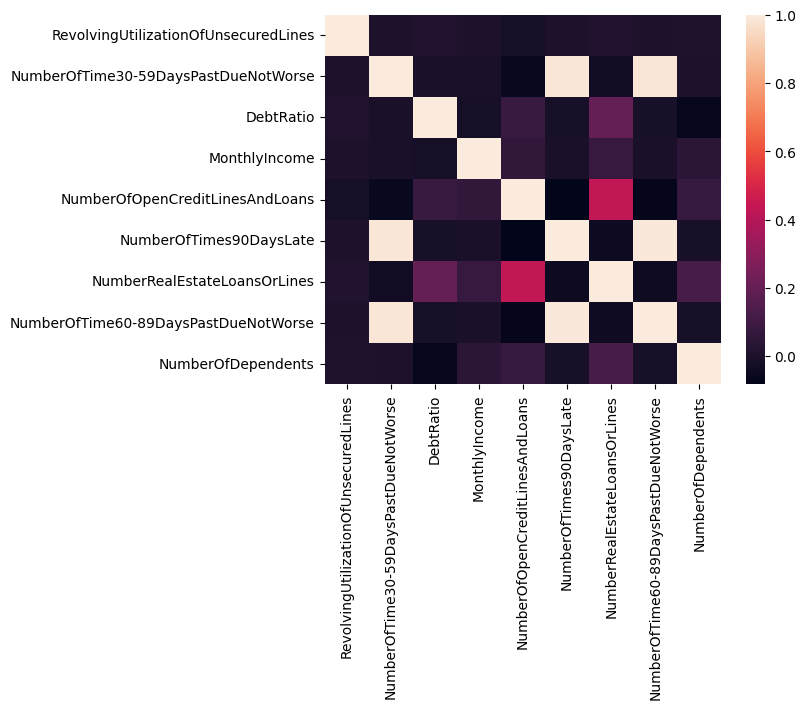

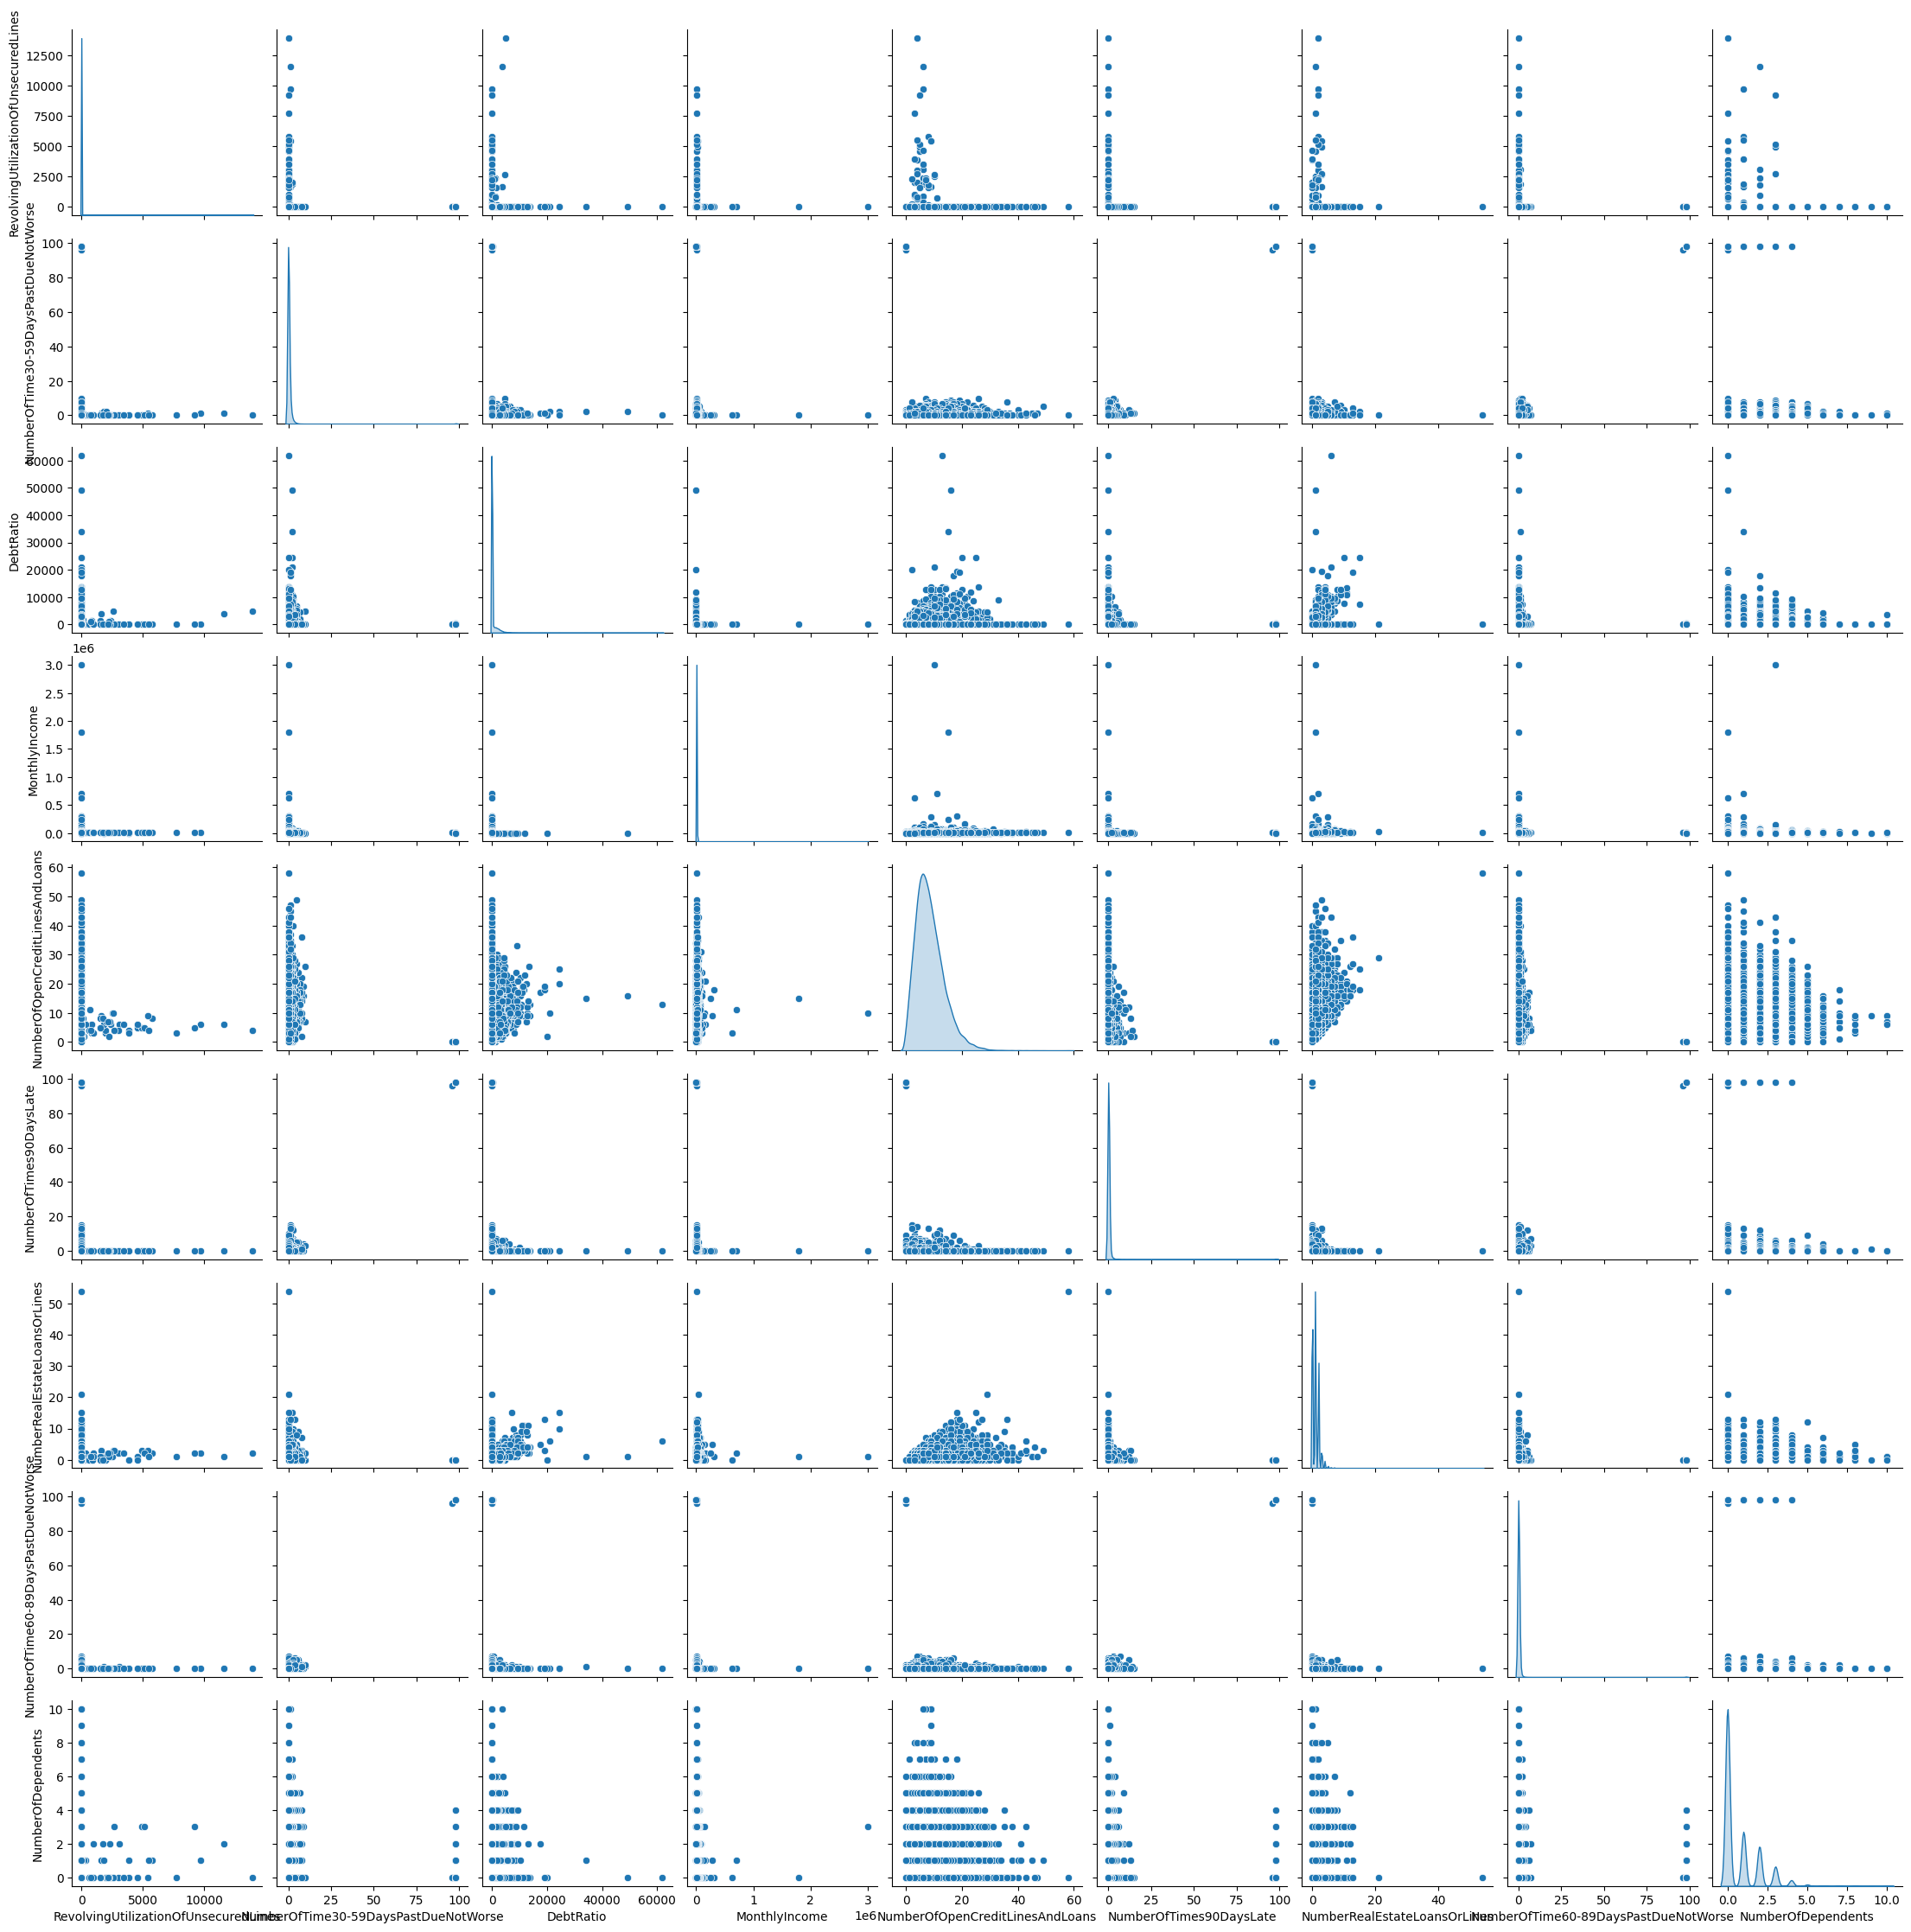

In [61]:
fn.get_bivariate_analysis(df_test)

In [62]:
fn.get_outliers(df_test)

[{'RevolvingUtilizationOfUnsecuredLines': 154,
  'NumberOfTime30-59DaysPastDueNotWorse': 5061,
  'DebtRatio': 6577,
  'MonthlyIncome': 1046,
  'NumberOfOpenCreditLinesAndLoans': 823,
  'NumberOfTimes90DaysLate': 1695,
  'NumberRealEstateLoansOrLines': 164,
  'NumberOfTime60-89DaysPastDueNotWorse': 1592,
  'NumberOfDependents': 2801},
 {'RevolvingUtilizationOfUnsecuredLines': [1.988047809,
   18.0,
   1.383886256,
   3.306693307,
   2.245847176,
   2.706323419,
   1.7607973419999998,
   1.445042275,
   1.471057884,
   3.722981914,
   817.0,
   356.0,
   1.664451827,
   1.773139746,
   1.5623960069999998,
   1.4171479340000002,
   1.4626865669999998,
   1.584717608,
   2.060587882,
   135.0,
   2355.0,
   1980.0,
   4556.0,
   1.551495017,
   1.952015995,
   1.756996016,
   3.384341637,
   2.297612046,
   2492.0,
   1.531561462,
   3050.0,
   7696.0,
   1.840351409,
   1.588741126,
   1629.0,
   2996.0,
   1.677740864,
   1.464387464,
   2.658585354,
   4881.0,
   2.003992016,
   6.42571

In [63]:
df_test["age"] = df_test["age"].str.replace(r"y\b", "", regex=True).astype(int)


In [64]:
df_test.loc[df_test["age"]<18, "age"]=18

In [65]:
fn.get_outliers(df_test)

[{'RevolvingUtilizationOfUnsecuredLines': 154,
  'age': 7,
  'NumberOfTime30-59DaysPastDueNotWorse': 5061,
  'DebtRatio': 6577,
  'MonthlyIncome': 1046,
  'NumberOfOpenCreditLinesAndLoans': 823,
  'NumberOfTimes90DaysLate': 1695,
  'NumberRealEstateLoansOrLines': 164,
  'NumberOfTime60-89DaysPastDueNotWorse': 1592,
  'NumberOfDependents': 2801},
 {'RevolvingUtilizationOfUnsecuredLines': [1.988047809,
   18.0,
   1.383886256,
   3.306693307,
   2.245847176,
   2.706323419,
   1.7607973419999998,
   1.445042275,
   1.471057884,
   3.722981914,
   817.0,
   356.0,
   1.664451827,
   1.773139746,
   1.5623960069999998,
   1.4171479340000002,
   1.4626865669999998,
   1.584717608,
   2.060587882,
   135.0,
   2355.0,
   1980.0,
   4556.0,
   1.551495017,
   1.952015995,
   1.756996016,
   3.384341637,
   2.297612046,
   2492.0,
   1.531561462,
   3050.0,
   7696.0,
   1.840351409,
   1.588741126,
   1629.0,
   2996.0,
   1.677740864,
   1.464387464,
   2.658585354,
   4881.0,
   2.003992016

In [66]:
df_test = df_test.transform(lambda x: x.fillna(x.mean()))

In [67]:
df_test.drop(["NumberOfTime60-89DaysPastDueNotWorse"], axis=1, inplace=True)

In [68]:
df_test.drop(["NumberRealEstateLoansOrLines"], axis=1, inplace=True)

In [69]:
df_test.to_csv("data/processed/test.csv")

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31442 entries, 15576 to 37695
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  31442 non-null  float64
 1   age                                   31442 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  31442 non-null  int64  
 3   DebtRatio                             31442 non-null  float64
 4   MonthlyIncome                         31442 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       31442 non-null  int64  
 6   NumberOfTimes90DaysLate               31442 non-null  int64  
 7   NumberOfDependents                    31442 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 3.2 MB


In [71]:
df_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfDependents
Id,,,,,,,,
15576,0.051782,53,0,0.009350,2245.000000,3,0,0.0
94308,0.022133,57,0,0.319562,7672.000000,26,0,2.0
53983,0.013693,68,0,0.139237,4064.000000,4,0,1.0
61359,0.018568,74,0,0.018760,10500.000000,27,0,0.0
71383,0.008630,66,0,9.000000,6766.741597,5,0,0.0
